### Rainfall Weather Forecasting

#### Project Description  

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.    
b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:   

Number of columns: 23

1. Date  - The date of observation
2. Location  -The common name of the location of the weather station
3. MinTemp  -The minimum temperature in degrees celsius
4. MaxTemp -The maximum temperature in degrees celsius
5. Rainfall  -The amount of rainfall recorded for the day in mm
6. Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine  -The number of hours of bright sunshine in the day.
8. WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am -Direction of the wind at 9am
11. WindDir3pm -Direction of the wind at 3pm
12. WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am -Humidity (percent) at 9am
15. Humidity3pm -Humidity (percent) at 3pm
16. Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am - Fraction of sky obscured by cloud at 9am. 
19. Cloud3pm -Fraction of sky obscured by cloud 
20. Temp9am-Temperature (degrees C) at 9am
21. Temp3pm -Temperature (degrees C) at 3pm
22. RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

#### Dataset Link-    
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv  
•	https://github.com/dsrscientist/dataset3


In [286]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### # Data Gathering

#### Since both the given links containing same dataset, we will use one of them

In [287]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### # Data Pre-processing

In [288]:
data.shape

(8425, 23)

#### Rows : 8425, Columns : 23

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#### Object columns : 7   
#### float64 columns  : 16


#### Our Target column are ' RainTomorrow ' and ' Rainfall ', lets check for the data in the column

In [290]:
data['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [291]:
data['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

#### Observation for column ' RainTomorrow ':  
the Target column is containing categorical data, and specifically Binary data so the problem is related to Classificaiton

#### Observation for column ' Rainfall ':  

the Target column is containing Continious data, so the problem is related to Regression

#### # Getting Null values, white spaces , '-' and 'NA' values in the dataset

In [292]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [293]:
data.isin([' ','NA','-']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Observations:
1. Lot of Null values in the dataset
2. No white space, NA values or ' - ' in the dataset

#### # getting unique values in each columns

In [294]:
#checking for value counts in each column
for column in data:
    print(data[column].value_counts(),'\n\n')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64 


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64 


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64 


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64 


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Nam

#### Observations:  

#### Columns having Categorical data:
1. Location
2. WindGustDir
3. WindDir9am
4. WindDir3pm
5. Cloud9am
6. Cloud3pm
7. RainToday
8. RainTomorrow

#### Columns having Conitions data :  
1. Date
2. MinTemp
3. MaxTemp
4. Rainfall
5. Evaporation
6. Sunshine
7. WindGustSpeed
8. WindSpeed9am
9. WindSpeed3pm
10. Humidity9am
11. Humidity3pm
12. Pressure9am
13. Pressure3pm
14. Temp9am
15. Temp3pm

#### # Working on Null values

In [295]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

#### Observations: 
The target columns 'RainTomorrow' and 'Rainfall' both are having null values.   
So first we drop the null values for these two columns

In [296]:
data=data.dropna(subset=['RainTomorrow', 'Rainfall'])
data.isnull().sum()

Date                0
Location            0
MinTemp            48
MaxTemp            34
Rainfall            0
Evaporation      3377
Sunshine         3839
WindGustDir       945
WindGustSpeed     945
WindDir9am        795
WindDir3pm        283
WindSpeed9am       49
WindSpeed3pm       83
Humidity9am        36
Humidity3pm        80
Pressure9am      1285
Pressure3pm      1286
Cloud9am         2207
Cloud3pm         2247
Temp9am            33
Temp3pm            74
RainToday           0
RainTomorrow        0
dtype: int64

In [297]:
#checking for datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8079 non-null   object 
 1   Location       8079 non-null   object 
 2   MinTemp        8031 non-null   float64
 3   MaxTemp        8045 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    4702 non-null   float64
 6   Sunshine       4240 non-null   float64
 7   WindGustDir    7134 non-null   object 
 8   WindGustSpeed  7134 non-null   float64
 9   WindDir9am     7284 non-null   object 
 10  WindDir3pm     7796 non-null   object 
 11  WindSpeed9am   8030 non-null   float64
 12  WindSpeed3pm   7996 non-null   float64
 13  Humidity9am    8043 non-null   float64
 14  Humidity3pm    7999 non-null   float64
 15  Pressure9am    6794 non-null   float64
 16  Pressure3pm    6793 non-null   float64
 17  Cloud9am       5872 non-null   float64
 18  Cloud3pm

#### Replacing the NA values with mean for the float datatype

In [298]:
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

data.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      945
WindGustSpeed      0
WindDir9am       795
WindDir3pm       283
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [299]:
data['WindGustDir'].value_counts()

N      674
E      550
SW     548
SSE    541
S      535
WNW    511
W      487
WSW    481
SE     469
ENE    397
SSW    381
NW     368
NE     346
NNE    335
ESE    298
NNW    213
Name: WindGustDir, dtype: int64

In [300]:
data['WindDir9am'].value_counts()

N      850
SW     676
NW     601
WSW    509
SE     491
WNW    462
SSW    451
ENE    426
NNE    417
W      396
NE     396
S      379
E      371
SSE    353
NNW    260
ESE    246
Name: WindDir9am, dtype: int64

In [301]:
data['WindDir3pm'].value_counts()

SE     793
S      679
SSE    600
WSW    559
NE     539
N      505
SW     473
WNW    467
NW     459
ESE    450
W      447
E      438
ENE    391
NNE    356
SSW    352
NNW    288
Name: WindDir3pm, dtype: int64

#### Replacing the Null values with mode in object datatype columns

In [302]:
data['WindGustDir'] = data['WindGustDir'].fillna('N')
data['WindDir3pm'] = data['WindDir3pm'].fillna('SE')
data['WindDir9am'] = data['WindDir9am'].fillna('N')
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Observation:
Now all the null values are removed from he dataset

#### # Encoding the Object datatype

In [303]:
from sklearn.preprocessing import LabelEncoder

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8079 non-null   object 
 1   Location       8079 non-null   object 
 2   MinTemp        8079 non-null   float64
 3   MaxTemp        8079 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    8079 non-null   float64
 6   Sunshine       8079 non-null   float64
 7   WindGustDir    8079 non-null   object 
 8   WindGustSpeed  8079 non-null   float64
 9   WindDir9am     8079 non-null   object 
 10  WindDir3pm     8079 non-null   object 
 11  WindSpeed9am   8079 non-null   float64
 12  WindSpeed3pm   8079 non-null   float64
 13  Humidity9am    8079 non-null   float64
 14  Humidity3pm    8079 non-null   float64
 15  Pressure9am    8079 non-null   float64
 16  Pressure3pm    8079 non-null   float64
 17  Cloud9am       8079 non-null   float64
 18  Cloud3pm

In [305]:
lab=LabelEncoder()

In [306]:
df=lab.fit_transform(data['Location'])
pd.Series(df)
data['Location']=df

df=lab.fit_transform(data['WindGustDir'])
pd.Series(df)
data['WindGustDir']=df

df=lab.fit_transform(data['WindDir9am'])
pd.Series(df)
data['WindDir9am']=df

df=lab.fit_transform(data['WindDir3pm'])
pd.Series(df)
data['WindDir3pm']=df

df=lab.fit_transform(data['RainToday'])
pd.Series(df)
data['RainToday']=df

df=lab.fit_transform(data['RainTomorrow'])
pd.Series(df)
data['RainTomorrow']=df


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8079 non-null   object 
 1   Location       8079 non-null   int32  
 2   MinTemp        8079 non-null   float64
 3   MaxTemp        8079 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    8079 non-null   float64
 6   Sunshine       8079 non-null   float64
 7   WindGustDir    8079 non-null   int32  
 8   WindGustSpeed  8079 non-null   float64
 9   WindDir9am     8079 non-null   int32  
 10  WindDir3pm     8079 non-null   int32  
 11  WindSpeed9am   8079 non-null   float64
 12  WindSpeed3pm   8079 non-null   float64
 13  Humidity9am    8079 non-null   float64
 14  Humidity3pm    8079 non-null   float64
 15  Pressure9am    8079 non-null   float64
 16  Pressure3pm    8079 non-null   float64
 17  Cloud9am       8079 non-null   float64
 18  Cloud3pm

In [308]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8079 non-null   datetime64[ns]
 1   Location       8079 non-null   int32         
 2   MinTemp        8079 non-null   float64       
 3   MaxTemp        8079 non-null   float64       
 4   Rainfall       8079 non-null   float64       
 5   Evaporation    8079 non-null   float64       
 6   Sunshine       8079 non-null   float64       
 7   WindGustDir    8079 non-null   int32         
 8   WindGustSpeed  8079 non-null   float64       
 9   WindDir9am     8079 non-null   int32         
 10  WindDir3pm     8079 non-null   int32         
 11  WindSpeed9am   8079 non-null   float64       
 12  WindSpeed3pm   8079 non-null   float64       
 13  Humidity9am    8079 non-null   float64       
 14  Humidity3pm    8079 non-null   float64       
 15  Pressure9am    8079 n

In [309]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [310]:
data.drop(['Date'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8079 non-null   int32  
 1   MinTemp        8079 non-null   float64
 2   MaxTemp        8079 non-null   float64
 3   Rainfall       8079 non-null   float64
 4   Evaporation    8079 non-null   float64
 5   Sunshine       8079 non-null   float64
 6   WindGustDir    8079 non-null   int32  
 7   WindGustSpeed  8079 non-null   float64
 8   WindDir9am     8079 non-null   int32  
 9   WindDir3pm     8079 non-null   int32  
 10  WindSpeed9am   8079 non-null   float64
 11  WindSpeed3pm   8079 non-null   float64
 12  Humidity9am    8079 non-null   float64
 13  Humidity3pm    8079 non-null   float64
 14  Pressure9am    8079 non-null   float64
 15  Pressure3pm    8079 non-null   float64
 16  Cloud9am       8079 non-null   float64
 17  Cloud3pm       8079 non-null   float64
 18  Temp9am 

#### Converting all the columns to 'float' data type

In [311]:
for column in data:
    data[column]=data[column].astype(float)

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8079 non-null   float64
 1   MinTemp        8079 non-null   float64
 2   MaxTemp        8079 non-null   float64
 3   Rainfall       8079 non-null   float64
 4   Evaporation    8079 non-null   float64
 5   Sunshine       8079 non-null   float64
 6   WindGustDir    8079 non-null   float64
 7   WindGustSpeed  8079 non-null   float64
 8   WindDir9am     8079 non-null   float64
 9   WindDir3pm     8079 non-null   float64
 10  WindSpeed9am   8079 non-null   float64
 11  WindSpeed3pm   8079 non-null   float64
 12  Humidity9am    8079 non-null   float64
 13  Humidity3pm    8079 non-null   float64
 14  Pressure9am    8079 non-null   float64
 15  Pressure3pm    8079 non-null   float64
 16  Cloud9am       8079 non-null   float64
 17  Cloud3pm       8079 non-null   float64
 18  Temp9am 

#### Now all the columns are converted to dtype as 'Float64'

In [313]:
data.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
4113,10.0,22.5,27.5,0.0,5.43473,7.709929,8.0,30.000000,10.0,10.0,...,1004.900000,8.00000,6.000000,24.0,27.3,0.0,1.0,1.0,1.0,2017.0
4152,10.0,20.5,32.8,1.4,5.43473,7.709929,4.0,33.000000,5.0,1.0,...,1013.300000,1.00000,4.479424,25.6,31.9,1.0,0.0,9.0,2.0,2017.0
1683,6.0,17.2,27.5,0.0,5.43473,7.709929,3.0,39.966919,4.0,4.0,...,1015.310437,5.00000,2.000000,23.0,27.5,0.0,1.0,21.0,11.0,2013.0
1021,3.0,8.9,18.9,0.0,2.40000,4.200000,15.0,28.000000,13.0,4.0,...,1007.700000,7.00000,6.000000,13.2,18.2,0.0,0.0,2.0,7.0,2009.0
3726,10.0,17.0,38.6,1.8,5.43473,7.709929,7.0,69.000000,6.0,7.0,...,1000.600000,4.52248,4.479424,24.1,38.0,1.0,0.0,11.0,12.0,2015.0
2515,7.0,17.1,22.7,0.2,5.43473,7.709929,9.0,30.000000,1.0,9.0,...,1015.310437,4.52248,4.479424,19.5,20.3,0.0,0.0,11.0,11.0,2014.0
4473,11.0,14.0,18.9,57.4,5.43473,7.709929,5.0,37.000000,15.0,6.0,...,1022.400000,8.00000,4.479424,14.8,18.0,1.0,1.0,3.0,6.0,2009.0
8328,4.0,22.4,32.4,0.0,6.40000,10.300000,3.0,39.000000,0.0,3.0,...,1009.500000,2.00000,2.000000,27.8,31.1,0.0,0.0,14.0,9.0,2012.0
7964,8.0,9.9,33.7,0.0,9.00000,12.600000,12.0,39.000000,1.0,12.0,...,1012.300000,1.00000,1.000000,26.7,32.9,0.0,0.0,23.0,12.0,2013.0
5521,5.0,13.1,17.8,0.6,3.60000,0.000000,15.0,33.000000,12.0,11.0,...,1024.100000,8.00000,7.000000,15.1,16.6,0.0,0.0,13.0,4.0,2010.0


### # EDA

#### Looking for basic stats

In [314]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,...,8079.000000,8079.00000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000,8079.000000
mean,5.775220,13.144839,23.855364,2.802451,5.434730,7.709929,7.196559,39.966919,7.252630,7.808021,...,1015.310437,4.52248,4.479424,17.757271,22.443498,0.242481,0.238148,15.756653,6.377398,2012.084664
std,3.174035,5.412351,6.104662,10.485324,3.897002,2.808155,4.712348,13.755686,4.588372,4.433035,...,6.193205,2.45517,2.321560,5.611654,5.933848,0.428610,0.425977,8.794239,3.404269,2.477082
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.00000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.200000,19.300000,0.000000,4.000000,7.709929,3.000000,31.000000,3.000000,4.000000,...,1011.500000,3.00000,3.000000,13.800000,18.100000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.200000,23.300000,0.000000,5.434730,7.709929,7.000000,39.966919,7.000000,8.000000,...,1015.310437,4.52248,4.479424,17.757271,21.900000,0.000000,0.000000,16.000000,6.000000,2011.000000
75%,8.000000,17.300000,28.000000,1.000000,5.434730,9.000000,12.000000,48.000000,12.000000,11.000000,...,1018.900000,7.00000,7.000000,21.900000,26.300000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.00000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


#### Observations:
looking at the columns with continious values
1. Column MinTemp: ranges from -2.00 to 28.50 where data is distributed around mean as mean and 50% are almost equal
2. Column MaxTemp : rangest from 8.20 to 45.50 where data is also distributed around mean
3. Column Rainfall: ranges from 0.00 to 371.00 where data seems to be having very large max value and lot of skewness towards right
4. Column Evaporation : ranges from 0.00 to 145.00 where data seems to be having very large max value and but data is distributed around mean as having mean and 50% value are almost equal
5. Column Sunshine: rangest from 0.00 to 13.90 where data is also distributed around mean
6. Column WindGustDir: rangest from 0.00 to 15.00 where data is also distributed around mean
7. Column WindGustSpeed : ranges from 7.0 to 107.00 with distribution around mean but having vary large max value
8. Column WindDir9am : ranges from 0.00 to 15.00 with distribution around mean
9. Column WindDir3pm : ranges from 0.00 to 15.00 with distribution around mean
10. Column Pressure3pm : ranges from 982.90 to 1036.00 and distribution around mean
11. Column Cloud9am : ranges from 0.00 to 8.00 and distribution around mean
12. Column Cloud3pm : ranges from 0.00 to 8.00 and distribution around mean
13. Column Temp9am : ranges from 1.90 to 39.40 with distribution around mean
14. Column Temp3pm : ranges from 7.30 to 44.10 with distribution seams to be little skewed

#### # Distplot

In [315]:
data.shape

(8079, 25)

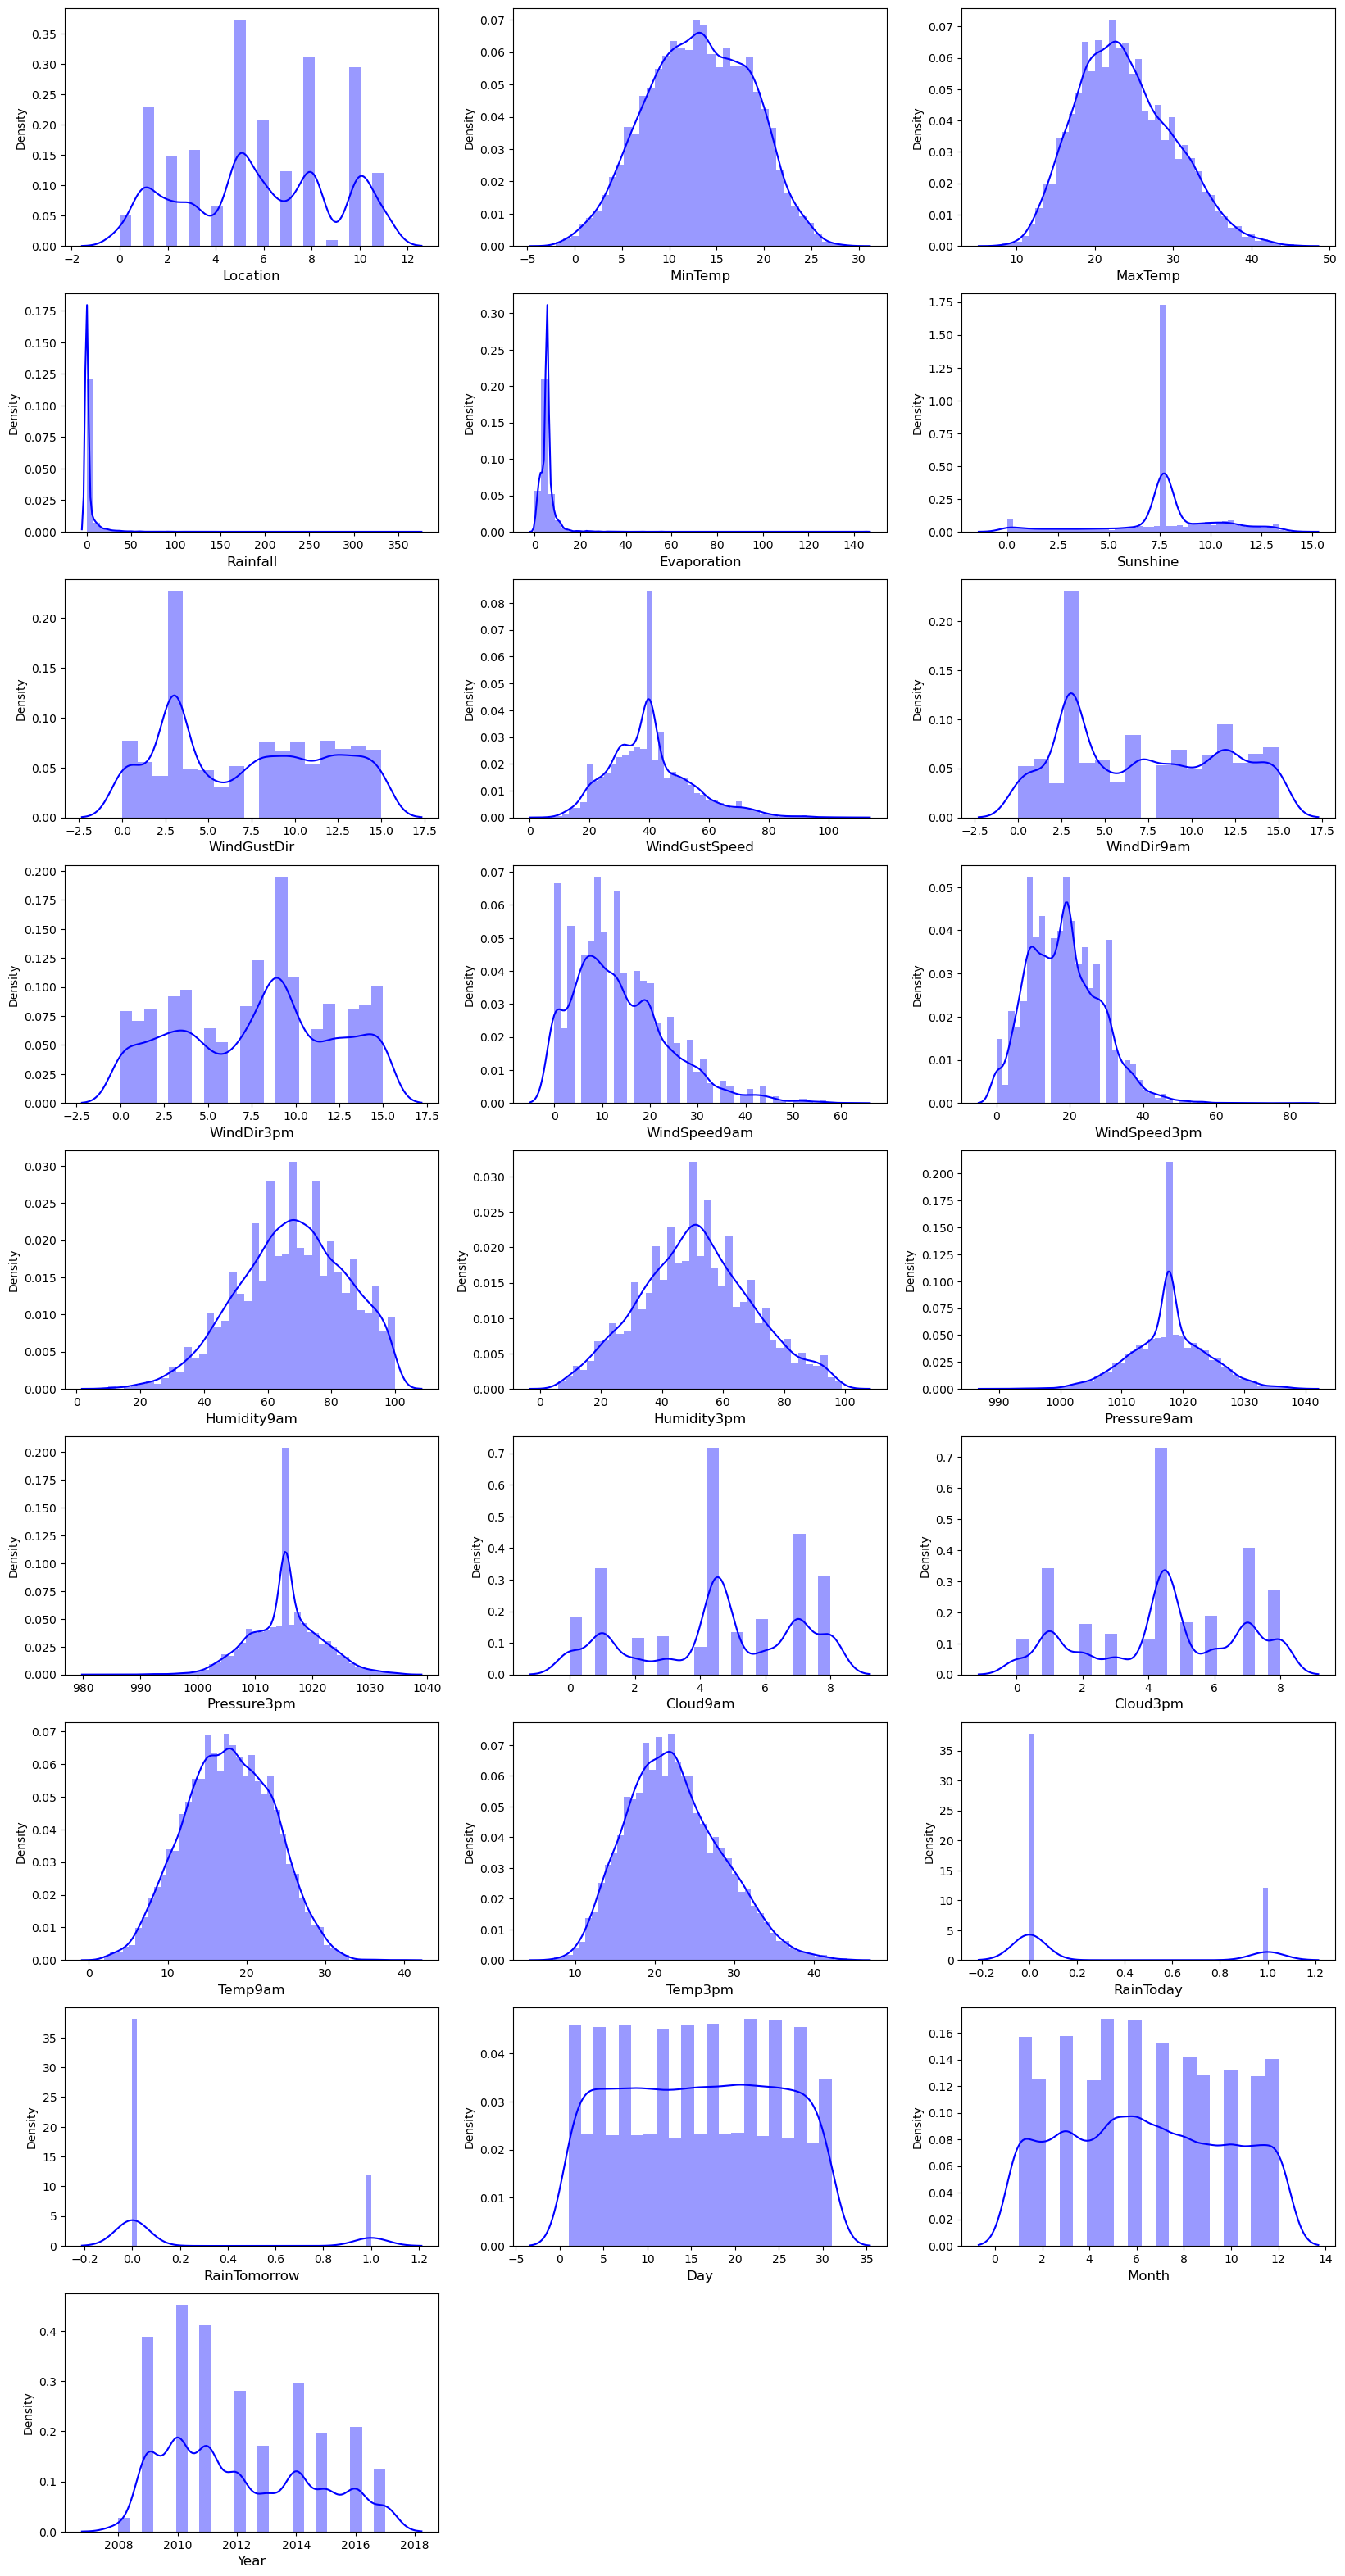

In [316]:
plt.figure(figsize=(20,40))
pltno=1
for column in data:
    if pltno<=25:
        plt.subplot(9,3,pltno)
        sns.distplot(data[column], color='blue' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. skewness on Right side seen for the columns - 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'
2. skewness on Left side seen for the columns - 'Humidity9am'
3. both side for the columns - 'Sunshine', 'Pressure9am', 'Pressure3pm'


#### # Box plot

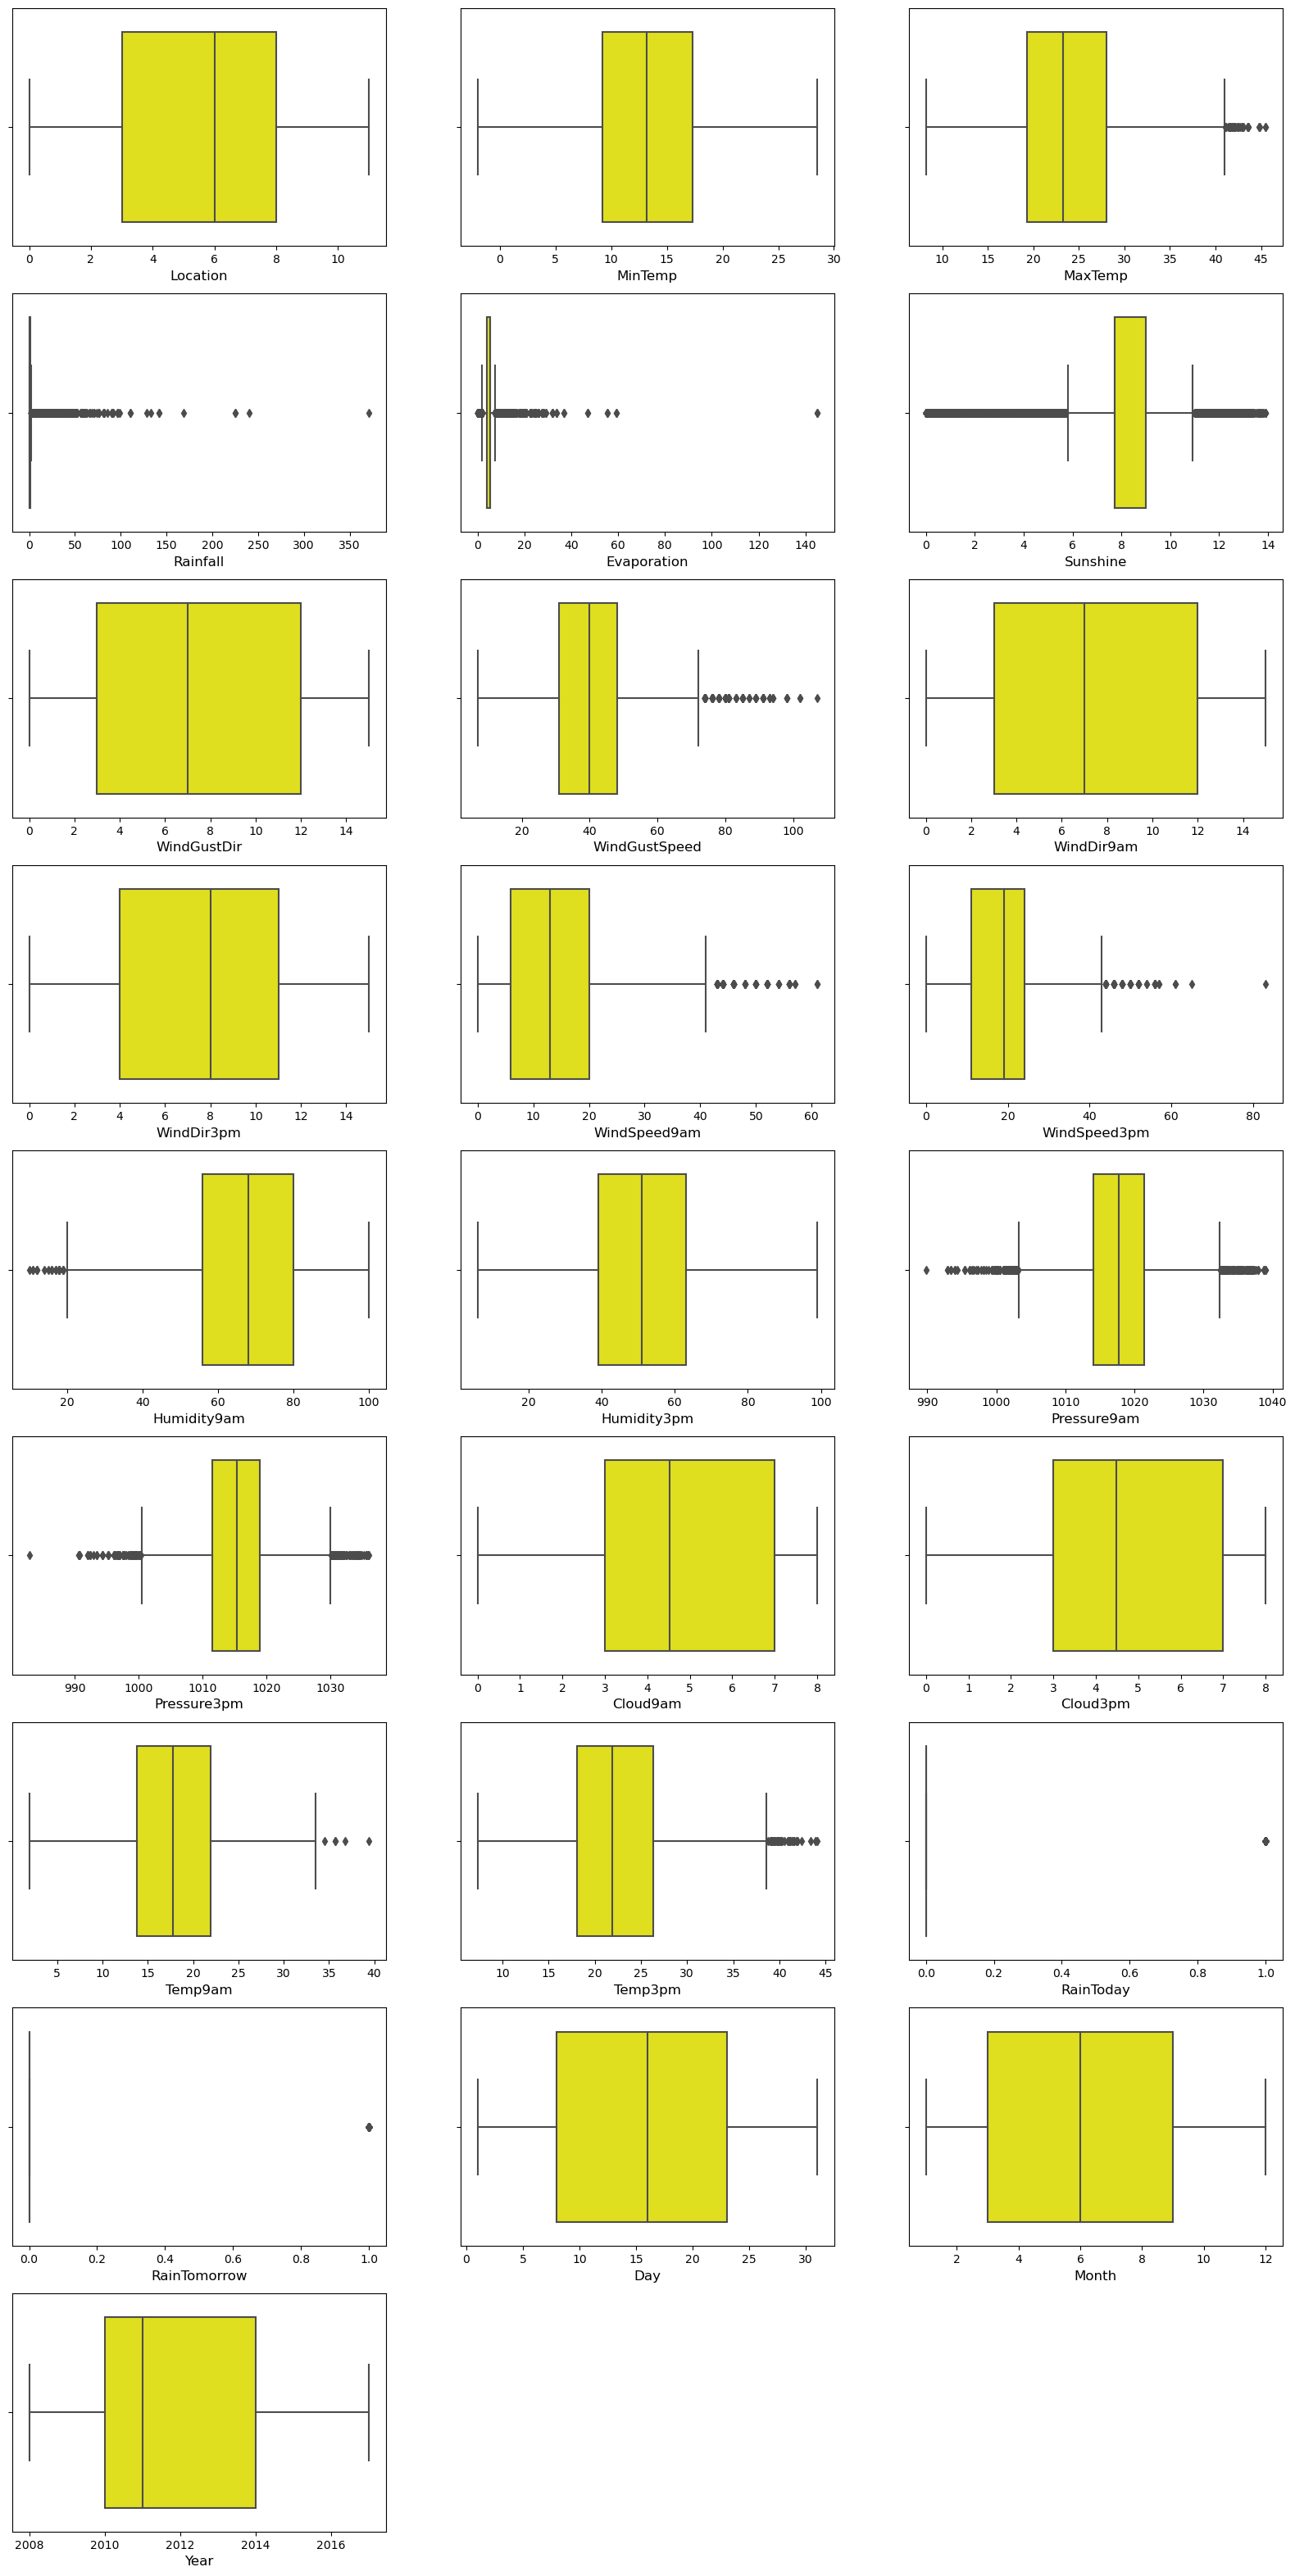

In [317]:
plt.figure(figsize=(20,40))
pltno=1
for column in data:
    if pltno<=25:
        plt.subplot(9,3,pltno)
        sns.boxplot(data[column], color='yellow' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. Outliers on Max side for columns : 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 
2. Outliers on Min side for columns : 'Humidity9am'
3. Outliers on Both side for columns : 'Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm'


#### # Checking for Skewness

In [318]:
data.skew()

Location         -0.051831
MinTemp          -0.072615
MaxTemp           0.388839
Rainfall         13.073756
Evaporation      14.088154
Sunshine         -0.755472
WindGustDir       0.124451
WindGustSpeed     0.758009
WindDir9am        0.170742
WindDir3pm       -0.113627
WindSpeed9am      0.945887
WindSpeed3pm      0.506719
Humidity9am      -0.251839
Humidity3pm       0.119921
Pressure9am      -0.027547
Pressure3pm      -0.006039
Cloud9am         -0.335281
Cloud3pm         -0.259391
Temp9am          -0.010854
Temp3pm           0.401031
RainToday         1.201947
RainTomorrow      1.229722
Day               0.000577
Month             0.054225
Year              0.421639
dtype: float64

#### Observation:
Skewness seen in 'Rainfall', 'Evaporation', 'RainToday', 'RainTomorrow'

#### 'RainToday' and 'RainTomorrow' are categorical columns so we will keep them as it is, similarly 'Rainfall' is our Target column so keep this column same as well. We shall work on the Skewness for column 'Evaporation' only

#### Treating skewness

In [319]:
#Sqrt method
temp=data[['Evaporation']]
temp=np.sqrt(temp)
temp.skew()

Evaporation    1.715586
dtype: float64

In [320]:
#cbrt method
temp=data[['Evaporation']]
temp=np.cbrt(temp)
temp.skew()

Evaporation    0.216968
dtype: float64

In [321]:
# log method
temp=data[['Evaporation']]
temp=np.log(temp)
temp.skew()

Evaporation   NaN
dtype: float64

#### So we select cbrt method for reducing skewness

In [322]:
#cbrt method
data['Evaporation']=np.cbrt(data['Evaporation'])

data.skew()

Location         -0.051831
MinTemp          -0.072615
MaxTemp           0.388839
Rainfall         13.073756
Evaporation       0.216968
Sunshine         -0.755472
WindGustDir       0.124451
WindGustSpeed     0.758009
WindDir9am        0.170742
WindDir3pm       -0.113627
WindSpeed9am      0.945887
WindSpeed3pm      0.506719
Humidity9am      -0.251839
Humidity3pm       0.119921
Pressure9am      -0.027547
Pressure3pm      -0.006039
Cloud9am         -0.335281
Cloud3pm         -0.259391
Temp9am          -0.010854
Temp3pm           0.401031
RainToday         1.201947
RainTomorrow      1.229722
Day               0.000577
Month             0.054225
Year              0.421639
dtype: float64

#### # Again plotting dist plot

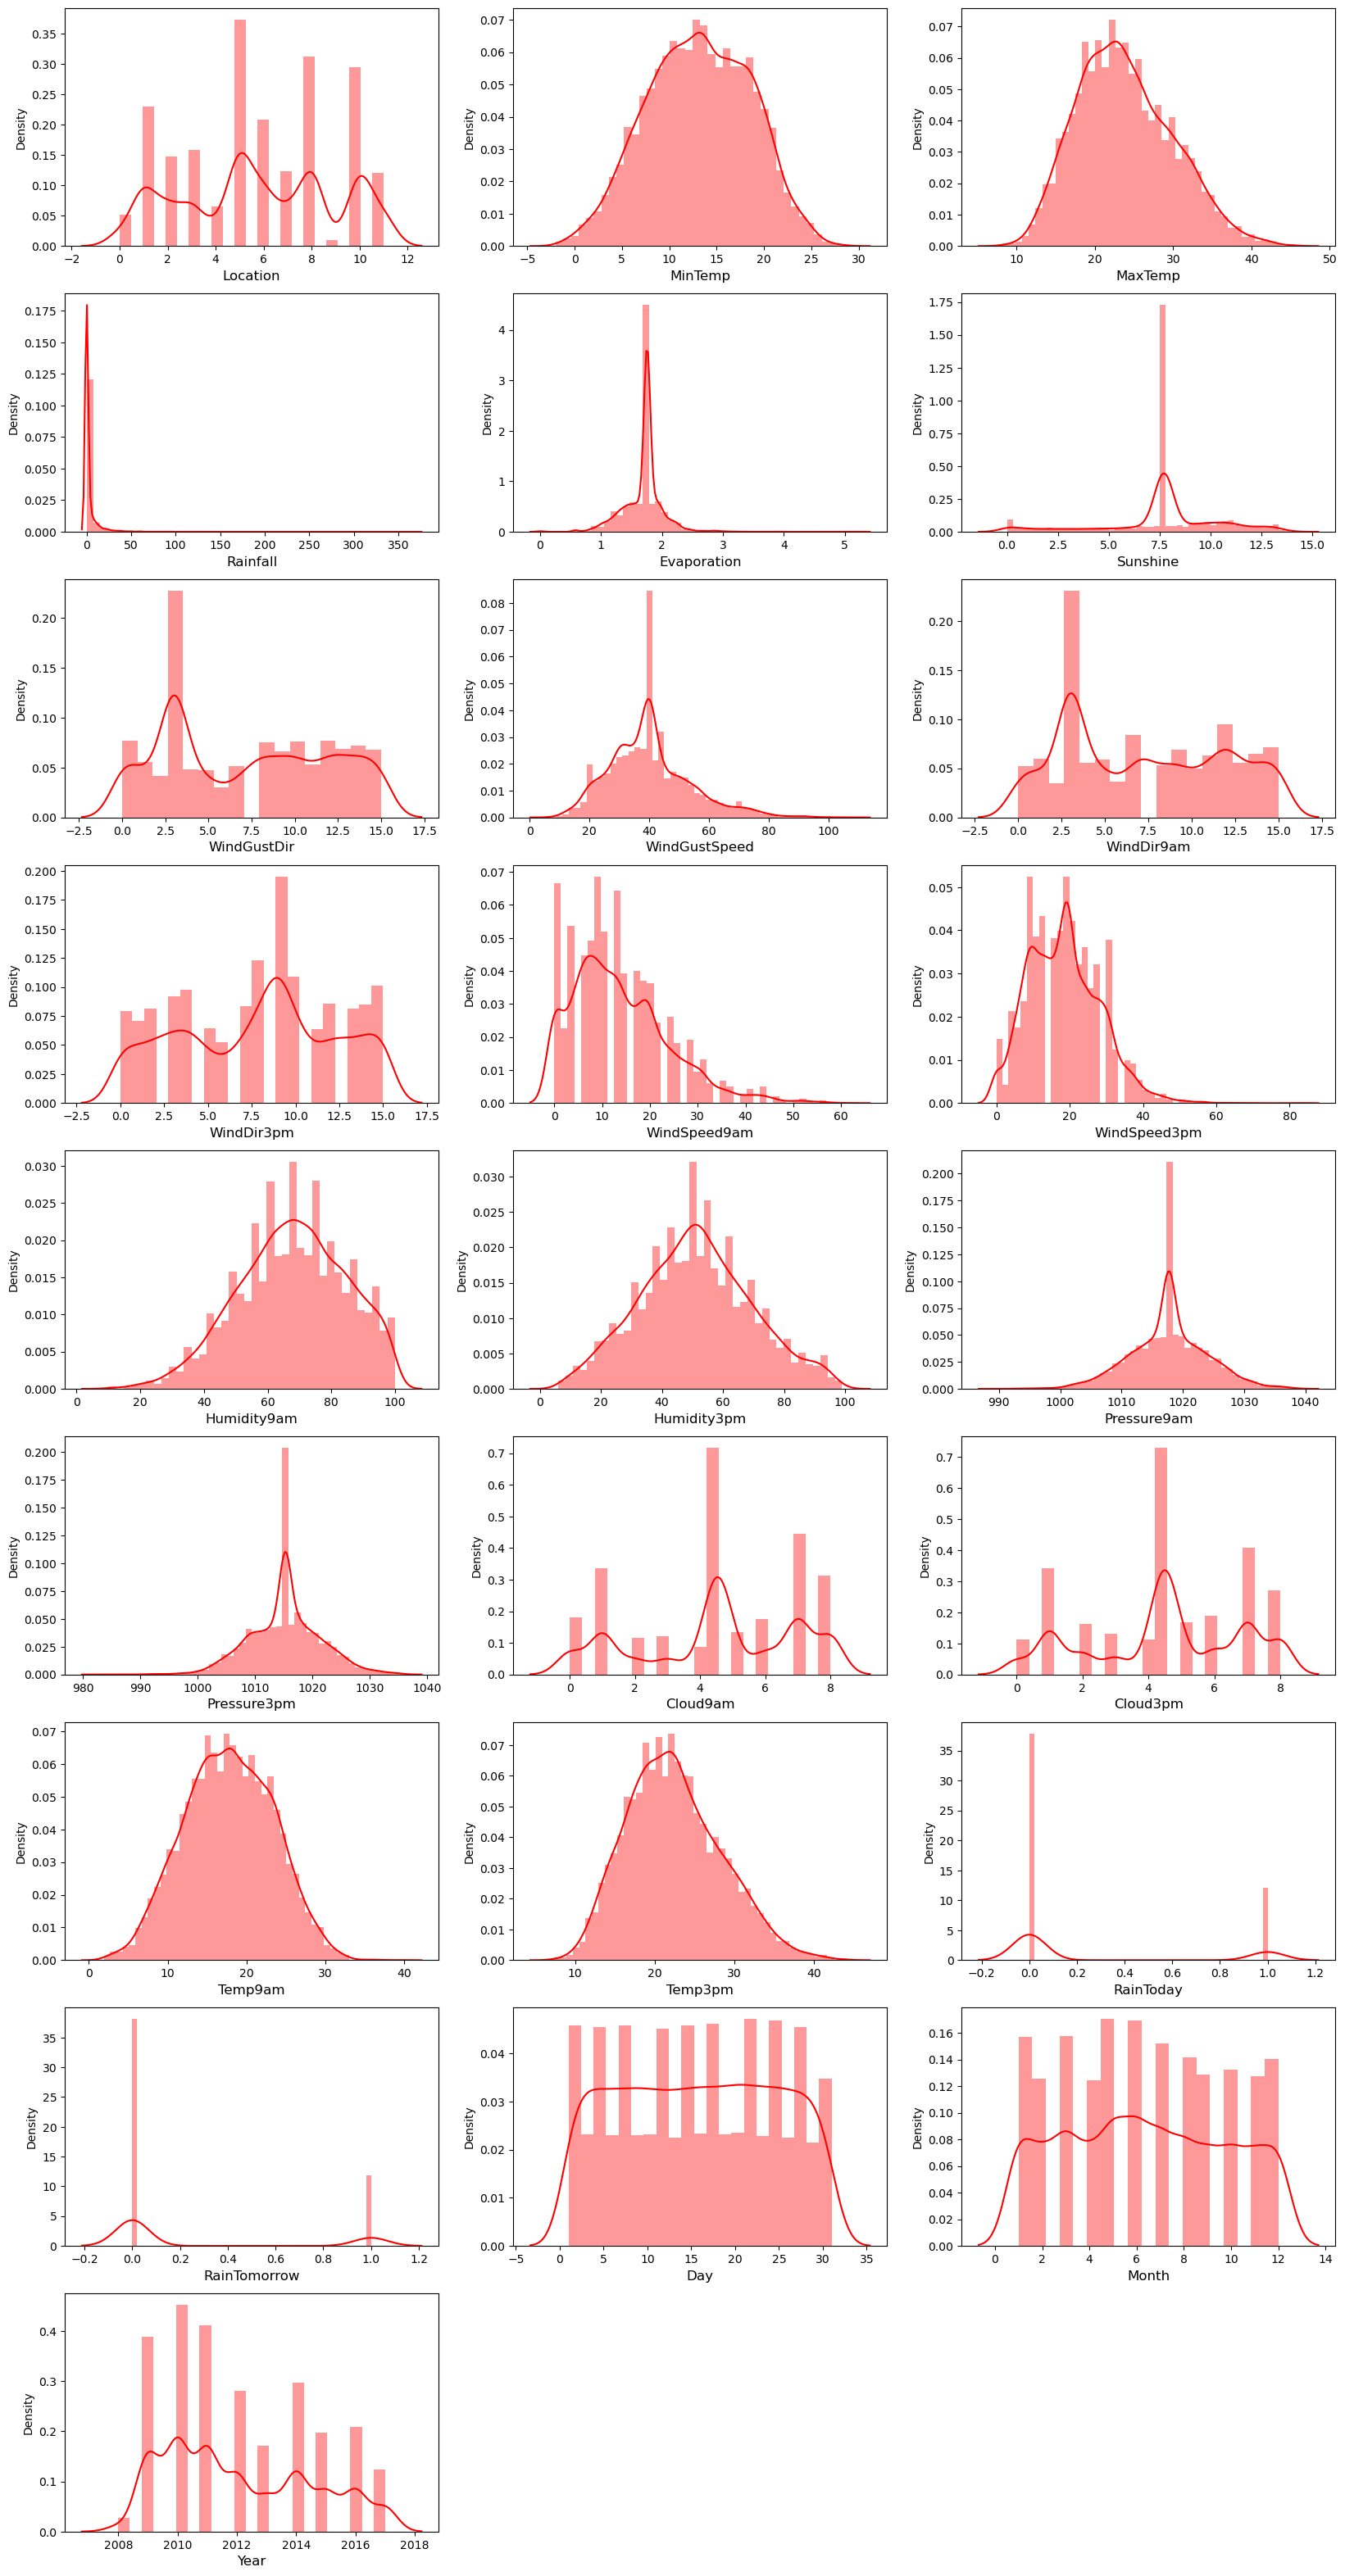

In [323]:
plt.figure(figsize=(20,40))
pltno=1
for column in data:
    if pltno<=25:
        plt.subplot(9,3,pltno)
        sns.distplot(data[column], color='red' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

In [324]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.9,0.6,1.758164,7.709929,13.0,44.0,13.0,14.0,...,1007.1,8.00000,4.479424,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.1,0.0,1.758164,7.709929,14.0,44.0,6.0,15.0,...,1007.8,4.52248,4.479424,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.7,0.0,1.758164,7.709929,15.0,46.0,13.0,15.0,...,1008.7,4.52248,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.0,0.0,1.758164,7.709929,4.0,24.0,9.0,0.0,...,1012.8,4.52248,4.479424,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.3,1.0,1.758164,7.709929,13.0,41.0,1.0,7.0,...,1006.0,7.00000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0


### # Multi-corelation heatmap

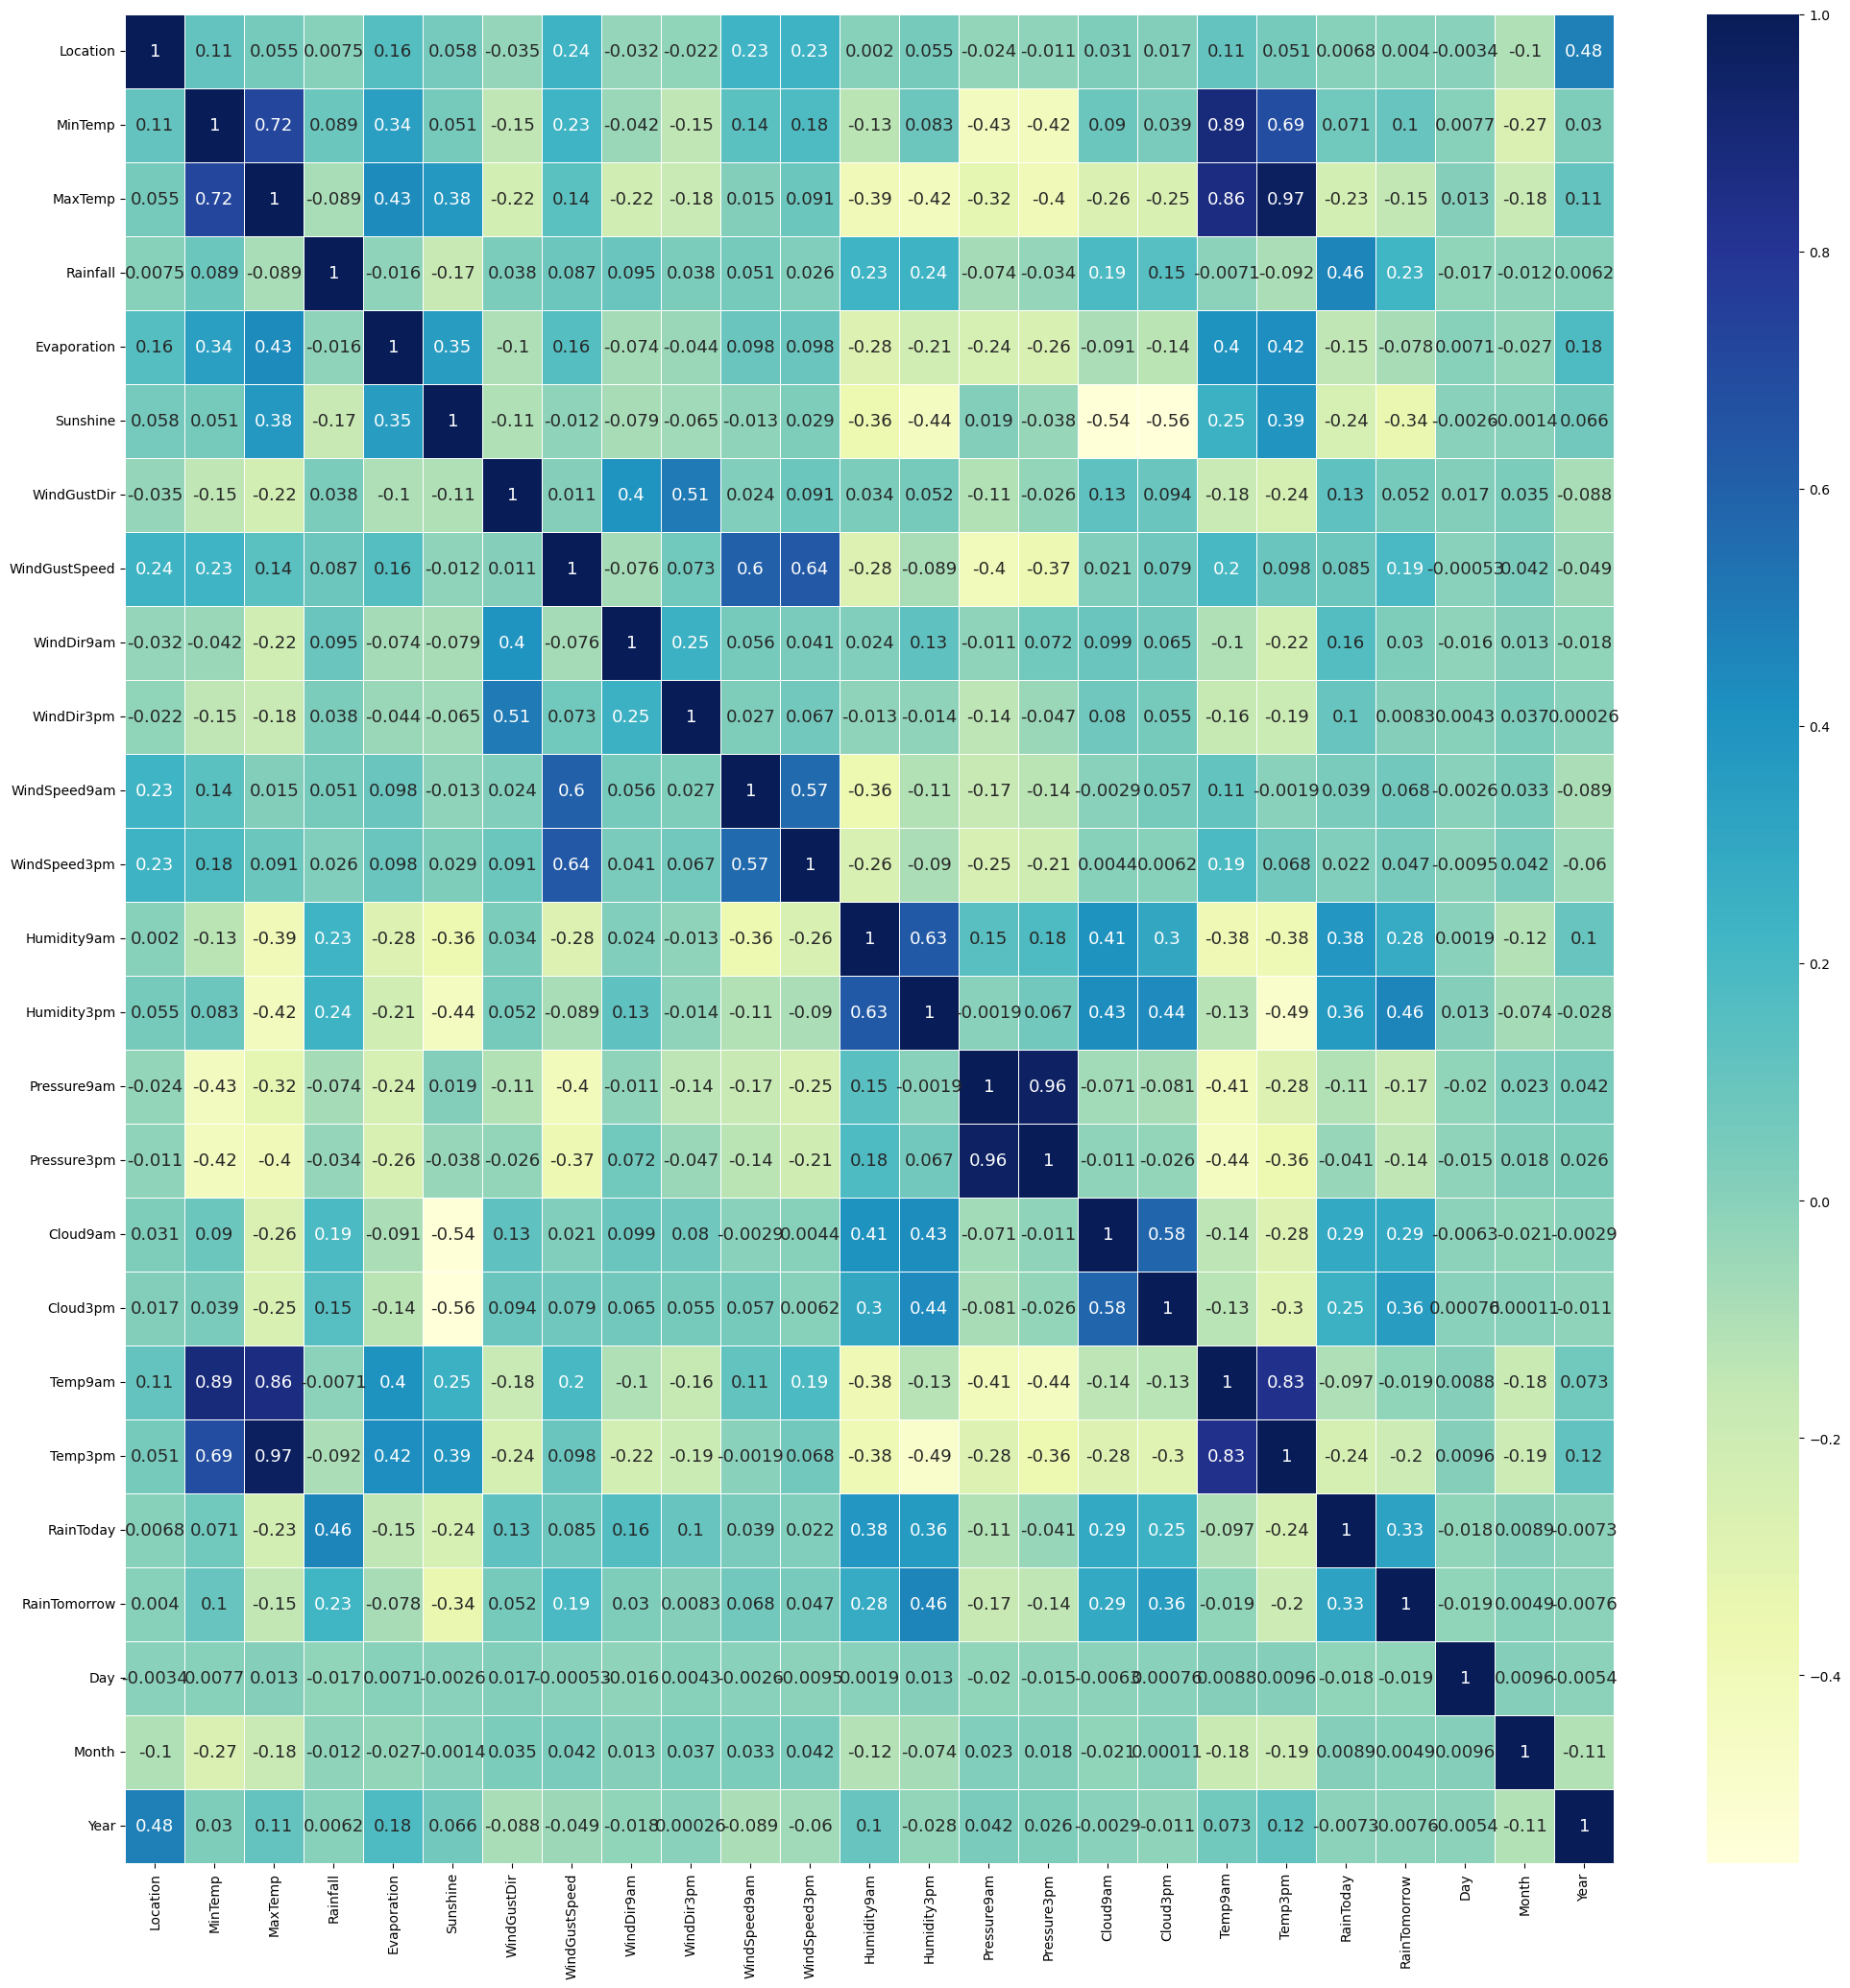

In [325]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5, annot_kws={"size":13})
plt.show()

#### # Observation:
1. column 'Temp9am' is 89% corelated with column 'MinTemp' and 86% corelated with column 'MaxTemp'
2. column 'Temp3pm' is 97% corelated with column 'MaxTemp'
4. column 'MaxTemp' is 72% corelated with column 'MinTemp'
4. column 'Temp9am' is 83% corelated with column 'Temp3pm'

'Temp9am' is 0.17% corelated to Target column Rainfall & 0.19% corelated to Target column 'RainTomorrow'  
'Temp3pm' is -9.2% corelated to Target column Rainfall & -20.0% corelated to Target column 'RainTomorrow'  
'MinTemp' is 8.9% corelated to Target column Rainfall & 10.0% corelated to Target column 'RainTomorrow'  
'MaxTemp' is -8.9% corelated to Target column Rainfall & -15.0% corelated to Target column 'RainTomorrow'  

#### Hence  dropping columns 'Temp9am' and 'MaxTemp'

In [326]:
data.drop(['Temp9am'], axis=1, inplace=True)
data.drop(['MaxTemp'], axis=1, inplace=True)


#### Re-plotting Multi co-relation heatmap

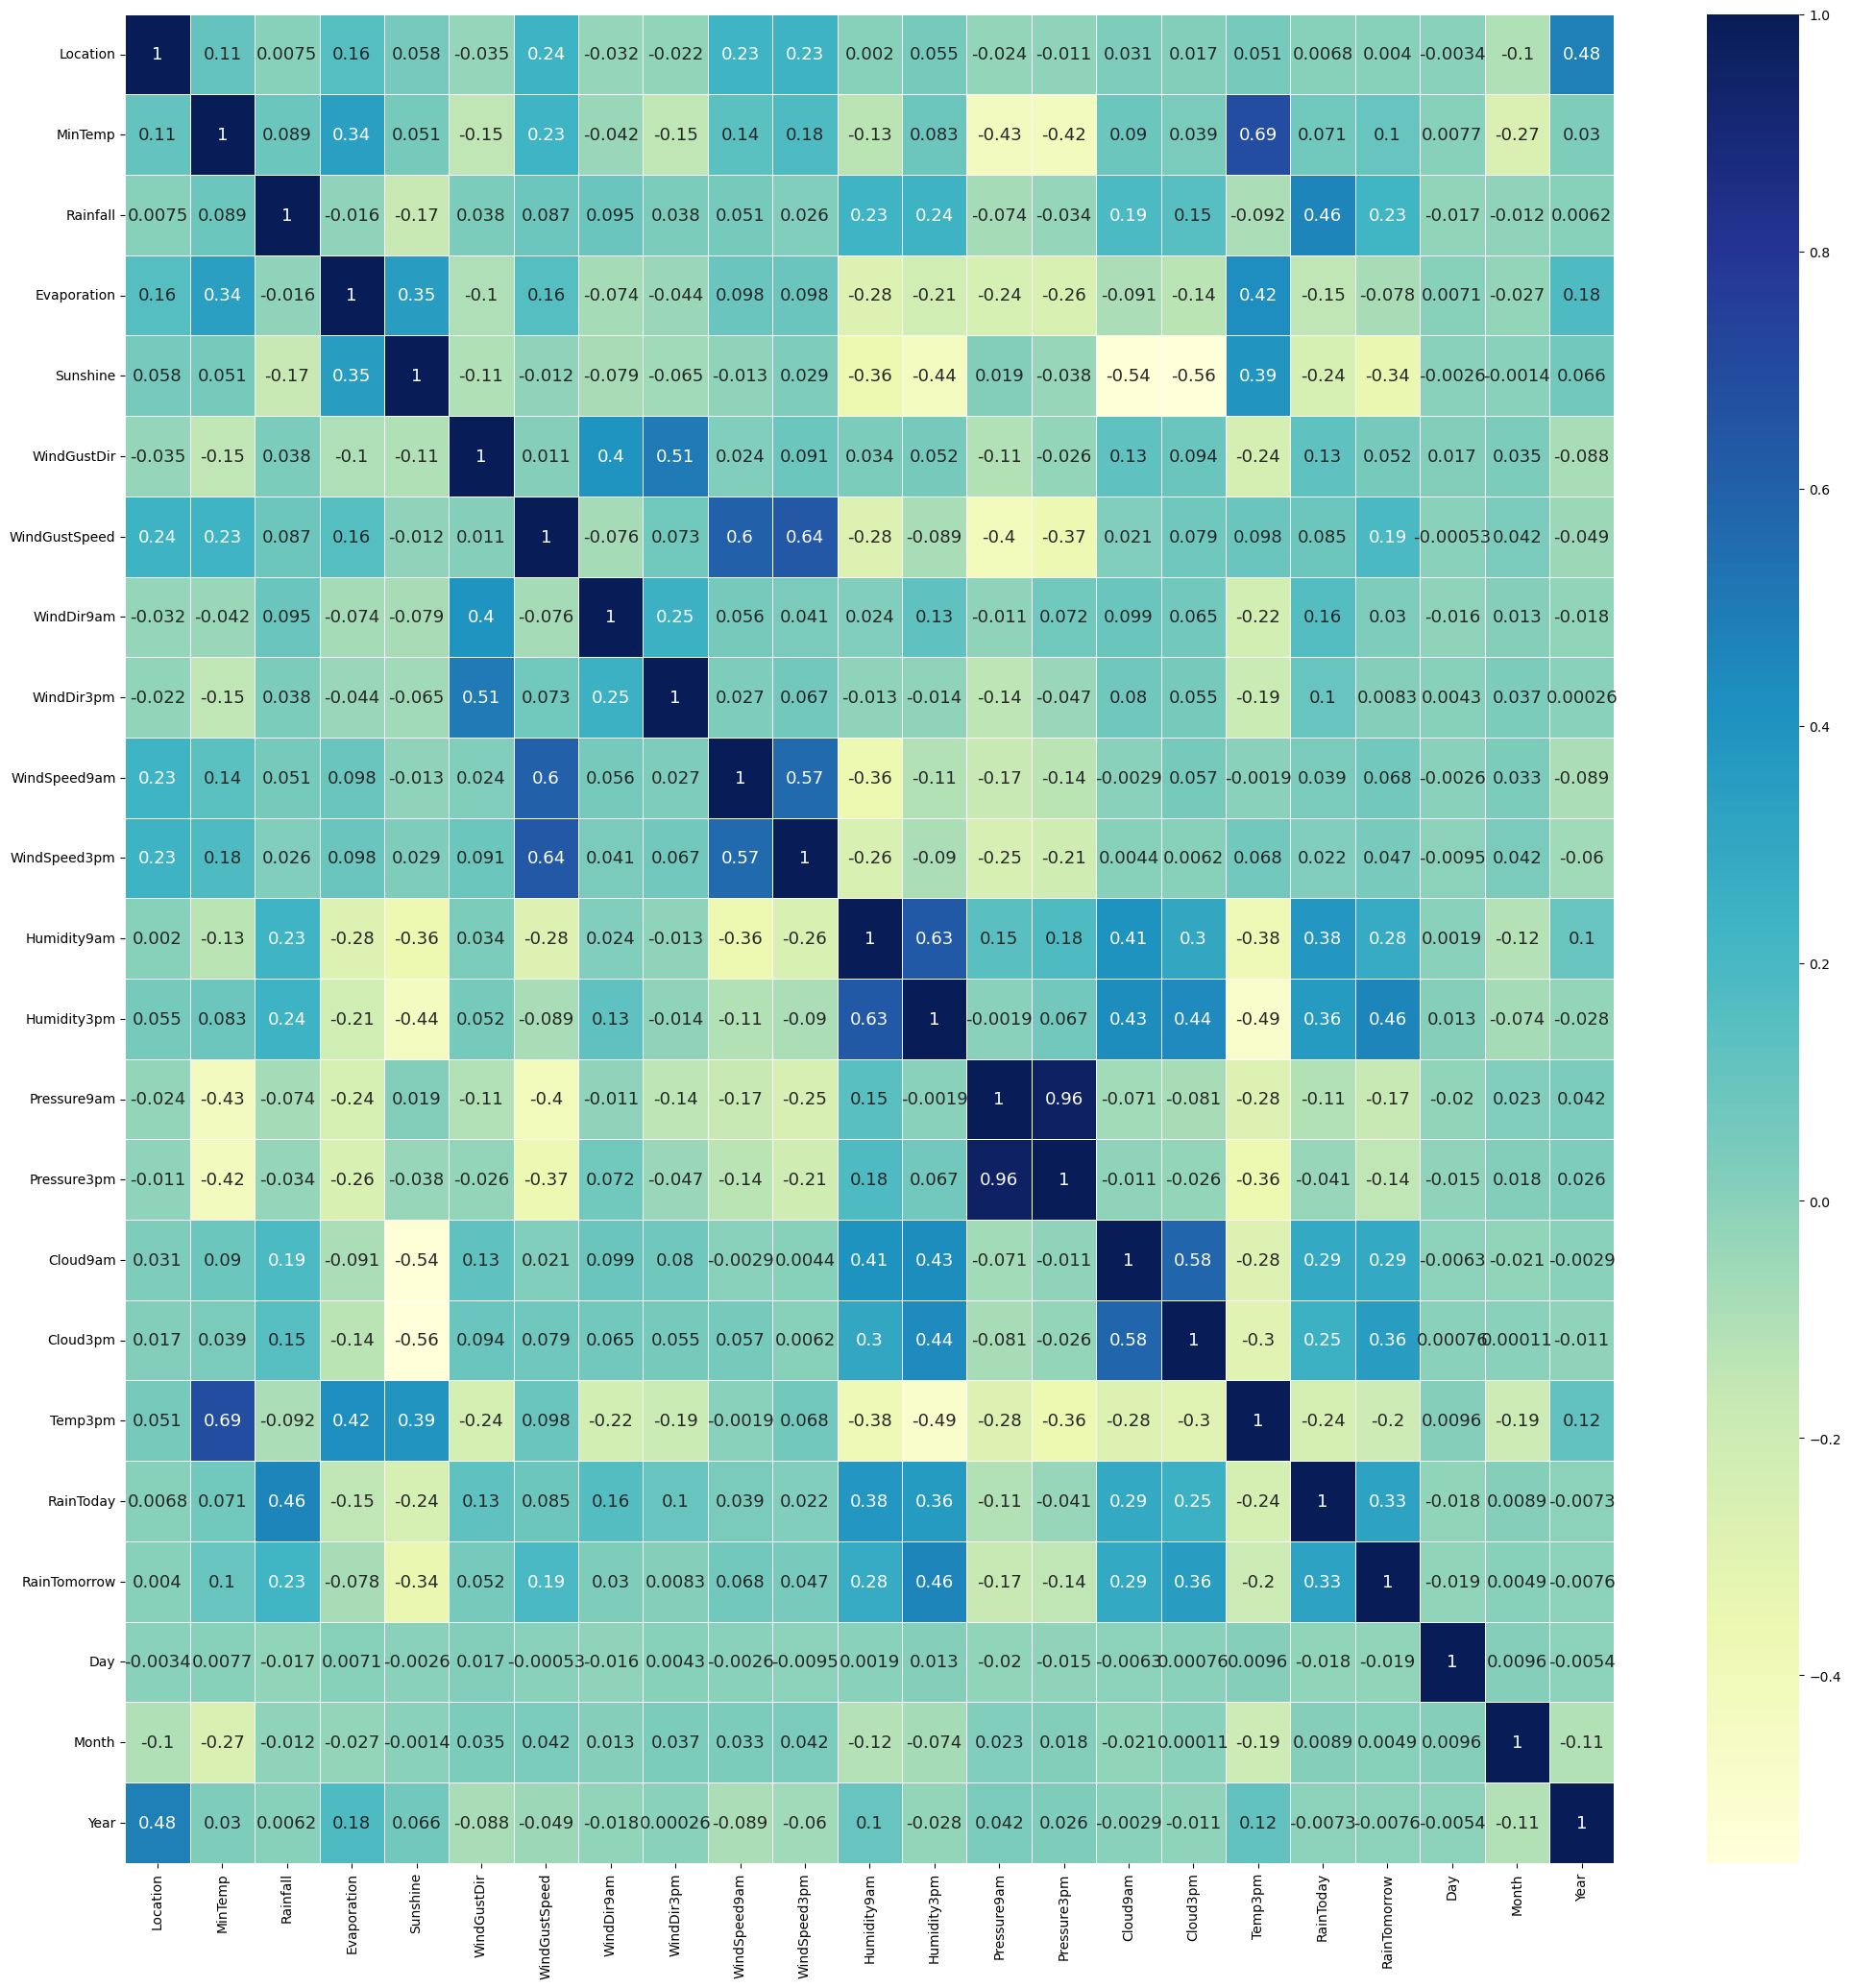

In [327]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5, annot_kws={"size":13})
plt.show()

#### Observation:
Multi co-linearity problem seems to be resolved now

### # Model buliding

### First taking 'Rainfall' as Target column

In [328]:
X=data.drop(['Rainfall'], axis=1)
y=data['Rainfall']
X.tail()

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
8419,9.0,3.5,1.758164,7.709929,0.0,31.0,2.0,0.0,15.0,13.0,...,1024.7,1021.2,4.52248,4.479424,20.9,0.0,0.0,20.0,6.0,2017.0
8420,9.0,2.8,1.758164,7.709929,0.0,31.0,9.0,1.0,13.0,11.0,...,1024.6,1020.3,4.52248,4.479424,22.4,0.0,0.0,21.0,6.0,2017.0
8421,9.0,3.6,1.758164,7.709929,6.0,22.0,9.0,3.0,13.0,9.0,...,1023.5,1019.1,4.52248,4.479424,24.5,0.0,0.0,22.0,6.0,2017.0
8422,9.0,5.4,1.758164,7.709929,3.0,37.0,9.0,14.0,9.0,9.0,...,1021.0,1016.8,4.52248,4.479424,26.1,0.0,0.0,23.0,6.0,2017.0
8423,9.0,7.8,1.758164,7.709929,9.0,28.0,10.0,3.0,13.0,7.0,...,1019.4,1016.5,3.00000,2.000000,26.0,0.0,0.0,24.0,6.0,2017.0


#### # Standard Scaler

In [329]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.head()

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.504557,0.047147,0.183467,3.163050e-15,1.231615,0.293212,1.252672,1.396867,0.617625,0.574619,...,-1.602076,-1.325799,1.416495,0.000000,-0.108452,-0.565772,-0.559099,-1.678095,1.651735,-1.649084
1,-1.504557,-1.061497,0.183467,3.163050e-15,1.443837,0.293212,-0.273018,1.622461,-0.961371,0.368807,...,-1.138972,-1.212765,0.000000,0.000000,0.312886,-0.565772,-0.559099,-1.564377,1.651735,-1.649084
2,-1.504557,-0.045240,0.183467,3.163050e-15,1.656059,0.438615,1.252672,1.622461,0.518938,0.780432,...,-1.618045,-1.067435,0.000000,-1.068065,0.127497,-0.565772,-0.559099,-1.450659,1.651735,-1.649084
3,-1.504557,-0.728904,0.183467,3.163050e-15,-0.678379,-1.160822,0.380849,-1.761435,-0.270560,-0.968973,...,-0.021135,-0.405379,0.000000,0.000000,0.683663,-0.565772,-0.559099,-1.336941,1.651735,-1.649084
4,-1.504557,0.804721,0.183467,3.163050e-15,1.231615,0.075107,-1.362797,-0.182284,-0.665309,0.162995,...,-1.107034,-1.503424,1.009166,1.516564,1.222976,-0.565772,-0.559099,-1.223223,1.651735,-1.649084


In [330]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [331]:
# Finding the best Random State

maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    print('working at random state : ', i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

working at random state :  0
working at random state :  1
working at random state :  2
working at random state :  3
working at random state :  4
working at random state :  5
working at random state :  6
working at random state :  7
working at random state :  8
working at random state :  9
working at random state :  10
working at random state :  11
working at random state :  12
working at random state :  13
working at random state :  14
working at random state :  15
working at random state :  16
working at random state :  17
working at random state :  18
working at random state :  19
working at random state :  20
working at random state :  21
working at random state :  22
working at random state :  23
working at random state :  24
working at random state :  25
working at random state :  26
working at random state :  27
working at random state :  28
working at random state :  29
working at random state :  30
working at random state :  31
working at random state :  32
working at random st

In [332]:
x_train,x_test,y_train,y_test=train_test_split(X ,y ,test_size=0.25, random_state = maxrs)

In [333]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   21.728237113482685  %
R2 Score on test data :   38.37930510820707  %
Mean Absolute Error :   3.0818573265319267
Mean Squared Error :   35.05047521004757
Root Mean Squared Error :   5.920344180032743


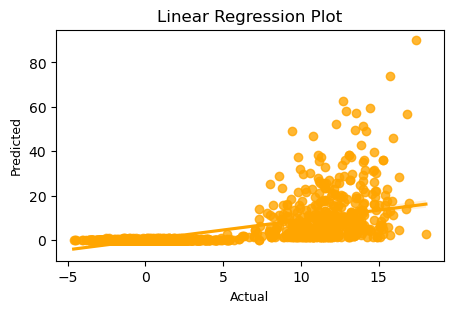

In [334]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='orange')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [335]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   46.92105520984465  %
R2 Score on test data :   38.26426621905941  %
Mean Absolute Error :   2.0175049504950495
Mean Squared Error :   35.115910495049505
Root Mean Squared Error :   5.925867910698778


In [336]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   92.31765760639585  %
R2 Score on test data :   37.70020784121309  %
Mean Absolute Error :   1.9120009900990098
Mean Squared Error :   35.43675261188119
Root Mean Squared Error :   5.952877674862905


In [337]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   54.05289266667739  %
Mean Absolute Error :   1.5940653465346541
Mean Squared Error :   26.1351799
Root Mean Squared Error :   5.112257808444328


In [338]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   -81.6781324881279  %
Mean Absolute Error :   2.202524752475248
Mean Squared Error :   103.3403613861386
Root Mean Squared Error :   10.165646137168979


In [339]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   21.72823418297827  %
R2 Score on test data :   38.381884878223474  %
Mean Absolute Error :   3.081357828682246
Mean Squared Error :   35.04900781074014
Root Mean Squared Error :   5.920220250188344


In [340]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   71.02878773229533  %
R2 Score on test data :   27.913550248157627  %
Mean Absolute Error :   2.3440160849747937
Mean Squared Error :   41.003502548034554
Root Mean Squared Error :   6.40339773464327


In [341]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   15.058355264488954  %
R2 Score on test data :   29.585455911365756  %
Mean Absolute Error :   1.8960888929260855
Mean Squared Error :   40.05250567750722
Root Mean Squared Error :   6.328704897331461


#### best performing model is :
  
Extra Trees Regressor model  
R2 Score on Train data :   100.0  %  
R2 Score on test data :   54.05 %  
Mean Absolute Error :   1.59  
Mean Squared Error :   26.13  
Root Mean Squared Error :   5.11  

### # Cross Validation Score

In [342]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [343]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.17292576 0.19175669 0.26208254 0.29515439 0.31070161]
Avg Score :  24.652420158606034 %
Difference between CV score and R2 Score is  :  13.72688494960104 %


In [344]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.13329411 0.29101782 0.27583865 0.20360063 0.27839528]
Avg Score :  23.642929668445714 %
Difference between CV score and R2 Score is  :  14.621336550613693 %


In [345]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.3157746  0.39841558 0.55578143 0.55259943 0.47386272]
Avg Score :  45.9286753006502 %
Difference between CV score and R2 Score is  :  -8.2284674594371 %


In [346]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.34532529 0.40821415 0.72365991 0.55717235 0.52960849]
Avg Score :  51.279603858703545 %
Difference between CV score and R2 Score is  :  2.7732888079738394 %


In [347]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [-0.45732969  0.22639428 -0.61922735  0.23996802 -0.40096088]
Avg Score :  -20.223112263206232 %
Difference between CV score and R2 Score is  :  -61.45502022492166 %


In [348]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.17291921 0.19176797 0.26209255 0.29516106 0.3106965 ]
Avg Score :  24.652745657284584 %
Difference between CV score and R2 Score is  :  13.729139220938888 %


In [349]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.33598292 0.41812427 0.5886912  0.51203519 0.43671071]
Avg Score :  45.83088562988012 %
Difference between CV score and R2 Score is  :  -17.9173353817225 %


In [350]:
# SVR model
score8=cross_val_score(svr,X,y,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.12258661 0.14539646 0.20824506 0.20148678 0.20524142]
Avg Score :  17.659126424363784 %
Difference between CV score and R2 Score is  :  11.926329487001972 %


#### So the best model is :

#### Extra Trees Regressor model

R2 Score on Train data : 100.0 %  
R2 Score on test data : 54.05 %  
Mean Absolute Error : 1.59  
Mean Squared Error : 26.13  
Root Mean Squared Error : 5.11  
  
Avg Score :  51.27 %  
Difference between CV score and R2 Score is  :  2.7 %  

### # Hyper parameter tuning

In [354]:
from sklearn.model_selection import GridSearchCV

In [355]:
params={'criterion' : ['mse','mae'],
       'max_features': ['auto', 'sqrt', 'log2'],
       'min_samples_split': [2,3,5,7],
        'n_jobs' : [-2,-1,1]}

In [356]:
gscv=GridSearchCV(et,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_jobs': [-2, -1, 1]})

In [357]:
print('Best Parameters : ', gscv.best_params_,'\n')
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )

Best Parameters :  {'criterion': 'mse', 'max_features': 'log2', 'min_samples_split': 2, 'n_jobs': 1} 


Best Score :  0.3551287763192046


In [362]:
best_model_rainfall=ExtraTreesRegressor(criterion = 'mse', max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2,  n_jobs= 1)
best_model_rainfall.fit(x_train,y_train)
y_pred=best_model_rainfall.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y_pred)*100,' %')

R2 Score on test data :   59.38547994544301  %


### # Saving model

In [363]:
#Saving model
import pickle
pickle.dump(best_model_rainfall,open('Rainfall_Wether_Forcasting_Rainfall.pkl','wb'))

In [364]:
#load model
model_rainfall=pickle.load(open('Rainfall_Wether_Forcasting_Rainfall.pkl','rb'))

In [365]:
prediction_rainfall = model_rainfall.predict(x_test)
prediction_rainfall

array([6.8500e-01, 1.0000e-02, 0.0000e+00, ..., 0.0000e+00, 1.4026e+01,
       1.4181e+01])

In [366]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_rainfall

df

,Actual,predicted
2254,0.0,0.685
8239,0.0,0.010
5462,0.0,0.000
4579,0.0,0.000
7487,0.0,0.033
...,...,...
532,0.0,0.199
7641,0.0,0.376
2915,0.0,0.000
6129,2.8,14.026


#### --------------------------------------------------------------------------------------------------------------------------------
#### --------------------------------------------------------------------------------------------------------------------------------

### #Now taking 'RainTomorrow' as Target column

#### Check for imbalance in the data for our target column 'RainTomorrow'

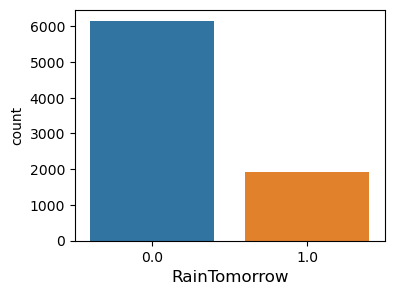

In [367]:
plt.figure(figsize=(4,3))
sns.countplot(data['RainTomorrow'])
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()

#### Observation : As we can see from the graph the Target column is having imbalance in the data

### # Using Oversampling Method for balancing the data

In [368]:
from imblearn.over_sampling import SMOTE
X=data.drop(['RainTomorrow'], axis=1)
y=data['RainTomorrow']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [369]:
y1.value_counts()

0.0    6155
1.0    6155
Name: RainTomorrow, dtype: int64

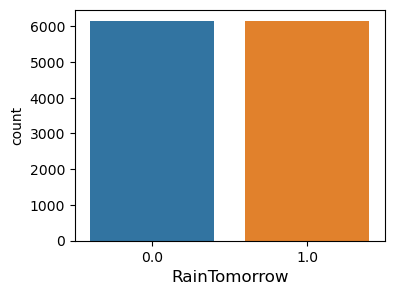

In [392]:
plt.figure(figsize=(4,3))
sns.countplot(y1)
plt.xlabel('RainTomorrow', fontsize=12)
plt.show()

#### Now we are having equal samples for data

In [371]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [372]:
X=x1
y=y1
X.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,Day,Month,Year
0,1.0,13.4,0.6,1.758164,7.709929,13.0,44.0,13.0,14.0,20.0,...,22.0,1007.7,1007.1,8.00000,4.479424,21.8,0.0,1.0,12.0,2008.0
1,1.0,7.4,0.0,1.758164,7.709929,14.0,44.0,6.0,15.0,4.0,...,25.0,1010.6,1007.8,4.52248,4.479424,24.3,0.0,2.0,12.0,2008.0
2,1.0,12.9,0.0,1.758164,7.709929,15.0,46.0,13.0,15.0,19.0,...,30.0,1007.6,1008.7,4.52248,2.000000,23.2,0.0,3.0,12.0,2008.0
3,1.0,9.2,0.0,1.758164,7.709929,4.0,24.0,9.0,0.0,11.0,...,16.0,1017.6,1012.8,4.52248,4.479424,26.5,0.0,4.0,12.0,2008.0
4,1.0,17.5,1.0,1.758164,7.709929,13.0,41.0,1.0,7.0,7.0,...,33.0,1010.8,1006.0,7.00000,8.000000,29.7,0.0,5.0,12.0,2008.0


In [373]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

#### # Standard Scaler

In [374]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X) , columns=X.columns)

X.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,Day,Month,Year
0,-1.566478,-0.007005,-0.278853,0.249971,0.200855,1.247941,0.174858,1.270102,1.446557,0.581446,...,-1.782993,-1.522611,-1.254018,1.296844,-0.222247,0.014888,-0.715278,-1.698532,1.722171,-1.680543
1,-1.566478,-1.153730,-0.326315,0.249971,0.200855,1.468530,0.174858,-0.304019,1.681077,-1.005469,...,-1.627283,-1.053737,-1.139929,-0.182813,-0.222247,0.443391,-0.715278,-1.582497,1.722171,-1.680543
2,-1.566478,-0.102565,-0.326315,0.249971,0.200855,1.689118,0.314482,1.270102,1.681077,0.482263,...,-1.367766,-1.538779,-0.993242,-0.182813,-1.332127,0.254850,-0.715278,-1.466461,1.722171,-1.680543
3,-1.566478,-0.809713,-0.326315,0.249971,0.200855,-0.737356,-1.221381,0.370605,-1.836726,-0.311194,...,-2.094414,0.078028,-0.325004,-0.182813,-0.222247,0.820473,-0.715278,-1.350426,1.722171,-1.680543
4,-1.566478,0.776591,-0.247211,0.249971,0.200855,1.247941,-0.034578,-1.428391,-0.195085,-0.707923,...,-1.212056,-1.021401,-1.433302,0.871352,1.353692,1.368956,-0.715278,-1.234391,1.722171,-1.680543


#### # Test train split

In [375]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    print('working at random state : ', i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

working at random state :  0
working at random state :  1
working at random state :  2
working at random state :  3
working at random state :  4
working at random state :  5
working at random state :  6
working at random state :  7
working at random state :  8
working at random state :  9
working at random state :  10
working at random state :  11
working at random state :  12
working at random state :  13
working at random state :  14
working at random state :  15
working at random state :  16
working at random state :  17
working at random state :  18
working at random state :  19
working at random state :  20
working at random state :  21
working at random state :  22
working at random state :  23
working at random state :  24
working at random state :  25
working at random state :  26
working at random state :  27
working at random state :  28
working at random state :  29
working at random state :  30
working at random state :  31
working at random state :  32
working at random st

In [376]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,Day,Month,Year
4085,1.359547,0.700142,0.290695,0.249971,0.200855,1.689118,1.989970,1.494977,-0.195085,0.085535,...,-1.056346,-1.506443,-2.020048,0.871352,-0.222247,0.443391,1.486824,1.202350,-0.731419,2.020406
10808,-0.163542,-1.807405,-0.326315,-1.043928,0.307232,0.042856,-0.726172,0.316342,0.816920,-0.296532,...,-0.704531,0.924427,0.821277,-1.090538,0.698780,-0.512580,-0.715278,-0.121460,0.353362,-0.477288
941,-0.916250,-0.045229,-0.326315,0.019257,0.583685,0.806764,0.174858,1.719851,0.039435,0.283899,...,0.033626,1.306801,1.435234,-0.830616,0.010782,-0.036532,-0.715278,-1.466461,-0.424720,-1.269326
2144,0.059091,0.489909,0.591289,0.249971,0.200855,-0.957944,-0.106699,-0.978642,0.273956,-1.402198,...,-0.266926,0.099427,0.084160,0.871352,-0.222247,0.125184,1.486824,-1.698532,-0.731419,1.197973
6762,0.709319,-0.542143,-0.326315,-1.106832,-0.399668,0.365587,-1.081757,-0.978642,0.039435,-0.807105,...,-0.329698,1.775676,1.826398,0.871352,0.010782,-0.327914,-0.715278,0.622174,-0.118021,-0.446893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,0.709319,-0.465695,-0.326315,-0.057634,0.724164,1.027352,-0.313826,-0.528893,0.977516,-0.807105,...,-0.277795,-0.326174,-0.406496,-0.405124,0.010782,0.169149,-0.715278,0.506138,-0.731419,0.786756
3972,1.359547,0.719255,-0.310494,0.249971,0.200855,0.586175,0.454106,0.820353,0.508476,1.672449,...,0.448853,0.045692,0.441026,-0.182813,-1.779764,0.546231,-0.715278,-1.466461,-1.651515,2.020406
10027,1.359547,1.367828,-0.092317,0.526207,0.200855,-0.637730,-0.611731,-0.793673,-0.365304,-0.365582,...,0.499926,-1.121808,-1.317909,0.891150,0.090218,1.073971,0.883049,1.243532,-1.483333,1.721937
473,-1.566478,-0.179014,-0.326315,0.249971,0.200855,0.365587,-1.500629,0.370605,-1.133166,-0.112830,...,-1.004442,0.805591,0.555115,0.871352,-0.222247,0.426251,-0.715278,-1.350426,-0.731419,-0.858110


In [377]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred)* 100,' %' )
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 94.0220922677063  %

 confusion_matrix  : 
 [[1461  109]
 [  75 1433]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      1570
         1.0       0.93      0.95      0.94      1508

    accuracy                           0.94      3078
   macro avg       0.94      0.94      0.94      3078
weighted avg       0.94      0.94      0.94      3078



In [378]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 87.19948018193632  %

 confusion_matrix  : 
 [[1355  215]
 [ 179 1329]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1570
         1.0       0.86      0.88      0.87      1508

    accuracy                           0.87      3078
   macro avg       0.87      0.87      0.87      3078
weighted avg       0.87      0.87      0.87      3078



In [379]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 86.25730994152046  %

 confusion_matrix  : 
 [[1370  200]
 [ 223 1285]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1570
         1.0       0.87      0.85      0.86      1508

    accuracy                           0.86      3078
   macro avg       0.86      0.86      0.86      3078
weighted avg       0.86      0.86      0.86      3078



In [380]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 83.07342430149448  %

 confusion_matrix  : 
 [[1318  252]
 [ 269 1239]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1570
         1.0       0.83      0.82      0.83      1508

    accuracy                           0.83      3078
   macro avg       0.83      0.83      0.83      3078
weighted avg       0.83      0.83      0.83      3078



In [381]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 91.84535412605588  %

 confusion_matrix  : 
 [[1472   98]
 [ 153 1355]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      1570
         1.0       0.93      0.90      0.92      1508

    accuracy                           0.92      3078
   macro avg       0.92      0.92      0.92      3078
weighted avg       0.92      0.92      0.92      3078



In [382]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 95.15919428200131  %

 confusion_matrix  : 
 [[1474   96]
 [  53 1455]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1570
         1.0       0.94      0.96      0.95      1508

    accuracy                           0.95      3078
   macro avg       0.95      0.95      0.95      3078
weighted avg       0.95      0.95      0.95      3078



In [383]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,lr_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,lr_y_pred))
print("\n classification_report  : \n", classification_report(y_test,lr_y_pred))


accuracy_score : 78.42755035737493  %

 confusion_matrix  : 
 [[1251  319]
 [ 345 1163]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1570
         1.0       0.78      0.77      0.78      1508

    accuracy                           0.78      3078
   macro avg       0.78      0.78      0.78      3078
weighted avg       0.78      0.78      0.78      3078



#### So, the best accuracy scores is 95.15 % with 'Extra Trees Classifier'

### # Cross validation score

In [384]:
from sklearn.model_selection import cross_val_score

In [385]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.74776604 0.62388302 0.86596263 0.90779854 0.83834281] 

Average CV Score 79.67506092607637   %
difference in score Random forest classifier :  0.14347031341629934


In [386]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.71242892 0.64256702 0.75345248 0.8058489  0.79610073] 

Average CV Score 74.20796100731113   %
difference in score support vector classifier :  0.12991519174625188


In [387]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.65190902 0.50081235 0.74857839 0.78797725 0.76035743] 

Average CV Score 68.99268887083673   %
difference in score Gradient Boosting classifier :   0.1726462107068374


In [388]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.64216084 0.52761982 0.70836718 0.73883022 0.75792039] 

Average CV Score 67.49796913078798   %
difference in score AdaBoost classifier :  0.15575455170706498


In [389]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.68521527 0.62753859 0.88139724 0.85621446 0.81153534] 

Average CV Score 77.23801787164906   %
difference in score Bagging classifier :  0.1460733625440681


In [390]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.75792039 0.67912266 0.87449228 0.91186028 0.7981316 ] 

Average CV Score 80.43054427294882   %
difference in score Extratree classifier :  0.1472865000905248


In [391]:
#Cross validation for Logistic Regression
cv_score = cross_val_score(lr,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Linear Regression : ', (accuracy_score(y_test,lr_y_pred)-cv_score.mean()))

[0.7034931  0.66734362 0.66978067 0.75954509 0.83265638] 

Average CV Score 72.65637692932575   %
difference in score Linear Regression :  0.0577117342804917


#### Average Cross Val score for ' Extra Trees classifier ' is  80.43 % and difference in score for Prediction done earlier and avg CV score for ' Extra Trees classifier ' is 0.1472 or 14.72%
#### Average Cross Val score for ' Logistic Regression ' is  72.65 % and difference in score for Prediction done earlier and avg CV score for ' Extra Trees classifier ' is 0.0577 or 5.77%


#### Observation:
1. Before Cross validation we found 'Extra Trees classifier' to be having best Accuracy score of 95.15 %
2. After Cross validation we found 'Extra Trees classifier' is having Average CV Score of 80.43% with difference in earlier accuracy score and average cv score is 0.1472 or 14.72%.
3. However After Cross Validation we found 'Logistic Regression' is having average CV score of 72.65% and difference in earlier accuracy score and average cv score is 0.0577 or 5.77 %

----------------------------------------------------------------------------------------------------------------  
----------------------------------------------------------------------------------------------------------------
#### #so taking the difference in accuracy score in consideration (5.77%) we select 'Logistic Regression' as our final model

In [394]:
#Final Model

Final_Model_RainTomorrow=LogisticRegression()
Final_Model_RainTomorrow.fit(x_train,y_train)
Final_Model_RainTomorrow_y_pred=Final_Model_RainTomorrow.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,Final_Model_RainTomorrow_y_pred))
print("\n classification_report  : \n", classification_report(y_test,Final_Model_RainTomorrow_y_pred))

accuracy_score : 0.7842755035737492

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1570
         1.0       0.78      0.77      0.78      1508

    accuracy                           0.78      3078
   macro avg       0.78      0.78      0.78      3078
weighted avg       0.78      0.78      0.78      3078



### # Confusion Matrix

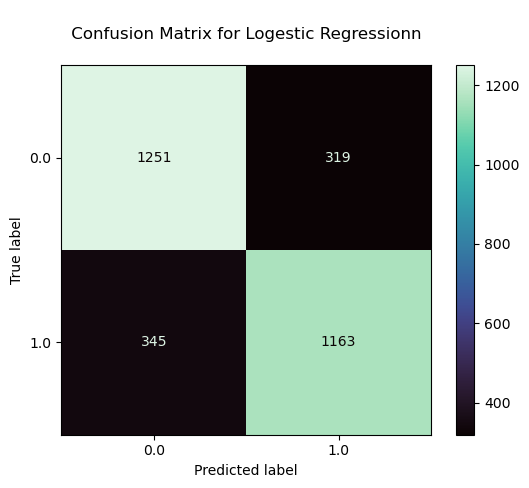

In [396]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(Final_Model_RainTomorrow.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for Logestic Regressionn \n')
plt.show()

In [397]:
#saving the model
import pickle
pickle.dump(Final_Model_RainTomorrow, open('Rainfall_Wether_Forcasting_Tomorrow_Rainfall.pkl', 'wb'))

In [398]:
#load model
load_model=pickle.load(open('Rainfall_Wether_Forcasting_Tomorrow_Rainfall.pkl', 'rb'))
prediction = load_model.predict(x_test)
prediction

array([1., 0., 0., ..., 1., 0., 0.])

In [399]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction

df.sample(10)

,Actual,predicted
3952,0.0,0.0
7134,1.0,1.0
1204,0.0,0.0
5919,0.0,0.0
11277,1.0,1.0
9878,1.0,1.0
10552,1.0,1.0
6387,0.0,0.0
8344,1.0,1.0
4802,1.0,1.0


###  Final Comments

1. The model is successfully forcasting whether or not it will rain tomorrow with the accuracy of 59.38% by using Extra Trees Regressor as our model.  

2. The model is successfully forcasting how much rainfall could be there with the accuracy of 78.4% by using Logistic Regression for this model.